In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

"""Generate data"""
trainSet = np.arange(0, 2*np.pi, 0.1)#List of [0, 6.2]. 63 elements

testSet = np.arange(0.05, 2*np.pi, 0.1) #List of [0.05, 6.25]. 63 elements

trainTargetSin = np.sin(2*trainSet)
trainTargetSin += np.random.normal(0,math.sqrt(0.1),trainTargetSin.shape[0]) #Add noise
testTargetSin = np.sin(2*testSet)
testTargetSin += np.random.normal(0,math.sqrt(0.1),testTargetSin.shape[0]) #Add noise

In [2]:
class LeastSquares:
    def __init__(self, train, trainTarget, prototypes):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.beta = np.ones(self.prototypes.size) #Variance - now set to equal for all
        self.phi = self.createPhi()
        self.weights = self.trainWeights()
        
    def createPhi(self):
        """Calls activation to calulate for each row. Puts them together to create phi matrix"""
        p = np.zeros((self.train.size, self.nodes))
        c = 0
        for x in self.train:
            p[:][c] = self.activation(x)
            c += 1
        return p
        
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        return np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2))
        
    def trainWeights(self):
        """Calculating W = (phi^T * phi)^-1 * phi^T * f. Split for easier reading"""
        phiphi = np.linalg.inv(np.dot(np.transpose(self.phi), self.phi)) #(phi^T * phi)^-1
        phif = np.dot(np.transpose(self.phi), self.trainTarget) #phi^T * f
        return np.dot(phiphi, phif)
        
    def run(self, patterns):
        res = np.zeros(patterns.size)
        c = 0
        for x in patterns:
            res[c] = sum(np.multiply(self.weights, self.activation(x)))
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)

In [3]:
class DeltaRule:
    def __init__(self, train, trainTarget, prototypes, step=0.01, maxEpoch=200):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.step = step
        self.beta = np.ones(self.prototypes.size) #Variance - now set to equal for all
        self.weights = np.ones(self.prototypes.size)
        self.epoch = 0
        self.maxEpoch = maxEpoch
        self.errThreshold = 0.3
        self.mainLoop()
        
    def mainLoop(self):
        while self.epoch < self.maxEpoch:
            for i in range(self.train.size):
                self.weights += self.deltaWeights(i)
                if self.residualError(self.train, self.trainTarget) < self.errThreshold:
                    return
            self.epoch += 1
            #if self.epoch%20 == 0:
                #print(self.epoch, " ", self.residualError(self.train, self.trainTarget))
            
    def deltaWeights(self, index):
        a = self.trainTarget[index] - np.dot(self.activation(self.train[index]), self.weights)
        b = self.step * a
        return b * self.activation(self.train[index])
        
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        return np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2))
        
    def run(self, patterns):
        res = np.zeros(patterns.size)
        c = 0
        for x in patterns:
            res[c] = sum(np.multiply(self.weights, self.activation(x)))
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)

In [6]:
index = np.linspace(0, trainSet.size-1, num = 10, dtype= int)
b = DeltaRule(trainSet, trainTargetSin, trainSet[index], 0.01, 100)

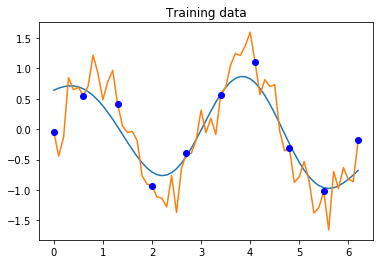

Residual error:  0.299827085756


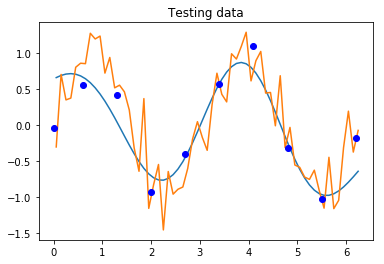

Residual error:  0.323771545426


In [8]:
plt.plot(trainSet, b.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "bo")
plt.title("Training data")
plt.show()
print("Residual error: ", b.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, b.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "bo")
plt.title("Testing data")
plt.show()
print("Residual error: ", b.residualError(testSet, testTargetSin))

In [10]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    dr = DeltaRule(trainSet, trainTargetSin, trainSet[index], 0.01, 200)
    print(i, "  -  ", dr.residualError(trainSet, trainTargetSin), "  -  ", dr.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error
1   -   0.551922530906   -   0.669210500391
2   -   0.512731740768   -   0.604851278815
3   -   0.512872469173   -   0.605092982993
4   -   0.421158178193   -   0.503131844484
5   -   0.512623133779   -   0.58710233867
6   -   0.299982582726   -   0.368524633108
7   -   0.299961860925   -   0.401456501593
8   -   0.299915174717   -   0.391910000132
9   -   0.299904522972   -   0.39241978567
10   -   0.29963082597   -   0.392063831088
11   -   0.29998946681   -   0.397787078171
12   -   0.299875806383   -   0.394838083498
13   -   0.299803630041   -   0.396573838626
14   -   0.299621668188   -   0.39487385136
15   -   0.299465772929   -   0.395725278695
16   -   0.299947252546   -   0.396690334348
17   -   0.29993048649   -   0.395735927139
18   -   0.299189765629   -   0.398959068369
19   -   0.299994351388   -   0.3955772158
20   -   0.29964276481   -   0.396377722107
21   -   0.299902356675   -   0.394841686749
22   -   0.299737866475   -   

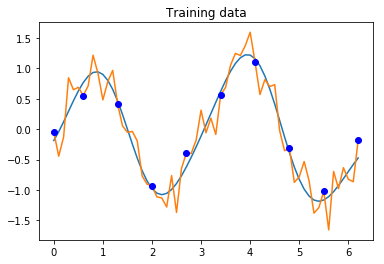

Residual error:  0.196654021144


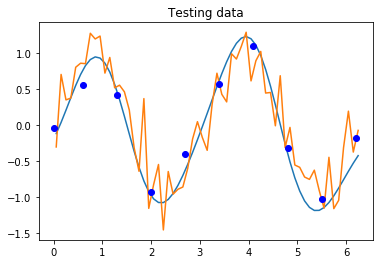

Residual error:  0.270538650437


In [10]:
#SIN
"""Checking training data error for 10 nodes"""
index = np.linspace(0, trainSet.size-1, num = 10, dtype= int)
a = LeastSquares(trainSet, trainTargetSin, trainSet[index])
plt.plot(trainSet, a.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "bo")
plt.title("Training data")
plt.show()
print("Residual error: ", a.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, a.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "bo")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSin))



In [12]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[index])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error
1   -   0.684935314343   -   0.597719664148
2   -   0.590061805489   -   0.564622015664
3   -   0.59201682475   -   0.565240382727
4   -   0.479101047043   -   0.469504632628
5   -   0.589919681885   -   0.558251199063
6   -   0.248883752298   -   0.30570562887
7   -   0.200235476517   -   0.273087087487
8   -   0.202019868046   -   0.26455827894
9   -   0.202455377441   -   0.264568777975
10   -   0.196654021144   -   0.270538650437
11   -   0.19835265908   -   0.270030813847
12   -   0.185543831474   -   0.257363526233
13   -   0.185814827652   -   0.257454768389
14   -   0.183366274192   -   0.265328480485
15   -   0.183721373281   -   0.264654494369
16   -   0.181819055726   -   0.267022369816
17   -   0.182689687324   -   0.265737806228
18   -   0.182662920633   -   0.269076689066
19   -   0.172243592497   -   0.276562991657
20   -   0.186027772518   -   0.294067641969
21   -   1.44335679824   -   1.51044638157
22   -   0.934142744563   -

In [8]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are clustered from index 0 and forward"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[0:i])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error
1   -   0.599782988042   -   0.599362611771
2   -   0.572553821688   -   0.549499215172
3   -   0.561377490975   -   0.554681152044
4   -   0.518836437318   -   0.528968028546
5   -   0.469317797653   -   0.500138888868
6   -   0.461695763028   -   0.468444298768
7   -   0.458588909714   -   0.469716944186
8   -   0.489737439092   -   0.476145976504
9   -   0.463827392687   -   0.474854489962
10   -   0.45879204142   -   0.470439606869
11   -   0.447813823631   -   0.48472978989
12   -   0.422692941994   -   0.436009063755
13   -   0.42979829162   -   0.432745751437
14   -   0.420453623868   -   0.407170253232
15   -   0.417315313946   -   0.406664370179
16   -   0.396350952389   -   0.384193899037
17   -   0.426143538466   -   0.415308114262
18   -   0.405518649146   -   0.424545996345
19   -   0.398261303634   -   0.381906575998
20   -   0.383120876949   -   0.380615230816
21   -   0.445237632684   -   0.475690087465
22   -   0.387924384242 